# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

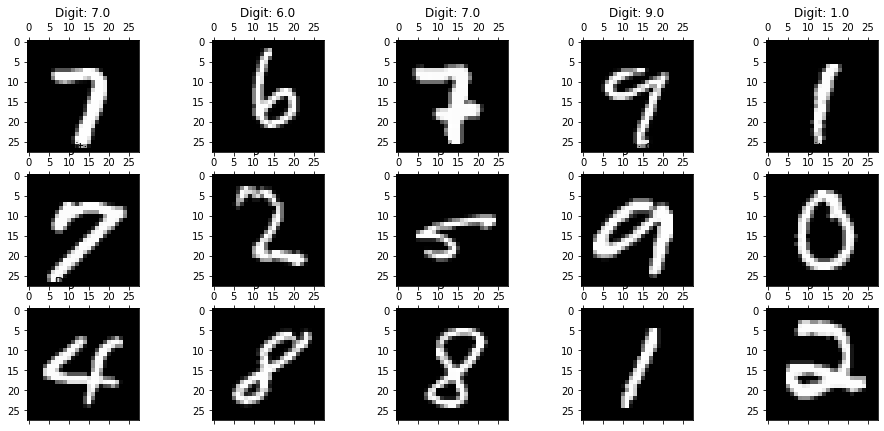

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['y'], axis = 1), df['y'], test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56000, 784) (56000,)
(14000, 784) (14000,)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train) 

cumsum = np.cumsum(pca.explained_variance_ratio_)
deter_8 = np.argmax(cumsum >= 0.8) + 1
deter_9 = np.argmax(cumsum >= 0.9) + 1
deter_95 = np.argmax(cumsum >= 0.95) + 1
deter_99 = np.argmax(cumsum >= 0.99)  + 1
print('차원의 수 80% : ', deter_8)
print('차원의 수 90% : ', deter_9)
print('차원의 수 95% : ', deter_95)
print('차원의 수 99% : ', deter_99)

차원의 수 80% :  43
차원의 수 90% :  87
차원의 수 95% :  154
차원의 수 99% :  331


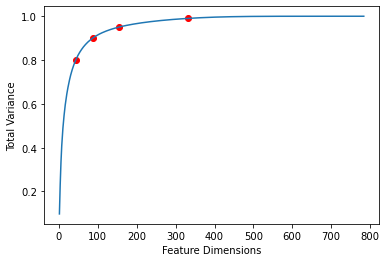

In [18]:
plt.plot(np.arange(1, 1+len(cumsum)), cumsum)

plt.scatter(deter_8 , 0.8, c = 'r')
plt.scatter(deter_9 , 0.9, c = 'r')
plt.scatter(deter_95 , 0.95, c = 'r')
plt.scatter(deter_99 , 0.99, c = 'r')

plt.ylabel('Total Variance')
plt.xlabel('Feature Dimensions')
plt.show()

In [19]:
pca = PCA(n_components= 87)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

- 통계의 대표적 신뢰구간 값인 80% 90% 95% 99% 를 비교해 보았을때 90%의 경우 elbow Point로 보이며 이 때 87개의 차원이 존재하게 된다.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) 


cumsum_lda = np.cumsum(lda.explained_variance_ratio_)
deter_8 = np.argmax(cumsum_lda >= 0.8) + 1
deter_9 = np.argmax(cumsum_lda >= 0.9) + 1
deter_95 = np.argmax(cumsum_lda >= 0.95) + 1
deter_99 = np.argmax(cumsum_lda >= 0.99)  + 1
print('차원의 수 80% : ', deter_8)
print('차원의 수 90% : ', deter_9)
print('차원의 수 95% : ', deter_95)
print('차원의 수 99% : ', deter_99)

차원의 수 80% :  5
차원의 수 90% :  7
차원의 수 95% :  8
차원의 수 99% :  9


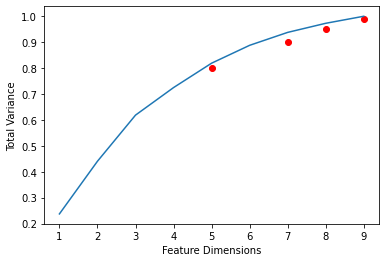

In [22]:
plt.plot(np.arange(1, 1+len(cumsum_lda)), cumsum_lda)

plt.scatter(deter_8 , 0.8, c = 'r')
plt.scatter(deter_9 , 0.9, c = 'r')
plt.scatter(deter_95 , 0.95, c = 'r')
plt.scatter(deter_99 , 0.99, c = 'r')

plt.ylabel('Total Variance')
plt.xlabel('Feature Dimensions')
plt.show()

- pca와 비교하여 elbow point는 보이지 않지만 분산이 비율이 커질수록 그래프가 완만해 지는것을 확인할 수 있다. 따라서 90%의 분산을 설명할 수 있는 주성분 개수 7을 선택하여 차원을 축소한다.

In [25]:
lda = LinearDiscriminantAnalysis(n_components= 7)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import * 
import time

#### RF - Origin Data

In [27]:
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Training Time : ", time.time()-start)

Training Time :  57.410969972610474


#### Decision Tree - Origin Data

In [30]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Training Time : ", time.time()-start)

Training Time :  31.373996257781982


#### Result - Origin Data

In [31]:
rf_result_origin = accuracy_score(y_test, rf.predict(X_test))
dt_result_origin = accuracy_score(y_test, dt.predict(X_test))

print('Random Forest Result - Origin Data : ', rf_result_origin)
print('Decision Tree Result - Origin Data : ', dt_result_origin)

Random Forest Result - Origin Data :  0.9693571428571428
Decision Tree Result - Origin Data :  0.8728571428571429


#### RF - PCA Data

In [32]:
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
print("Training Time : ", time.time()-start)

Training Time :  91.8259756565094


#### Decision Tree - PCA Data

In [33]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
print("Training Time : ", time.time()-start)

Training Time :  22.716997861862183


#### Result - PCA Data

In [34]:
rf_result_pca = accuracy_score(y_test, rf.predict(X_test_pca))
dt_result_pca = accuracy_score(y_test, dt.predict(X_test_pca))

print('Random Forest Result - PCA Data : ', rf_result_pca)
print('Decision Tree Result - PCA Data : ', dt_result_pca)

Random Forest Result - PCA Data :  0.9512142857142857
Decision Tree Result - PCA Data :  0.8333571428571429


#### RF - LDA Data

In [35]:
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)
print("Training Time : ", time.time()-start)

Training Time :  21.653990507125854


#### Decision Tree - LDA Data

In [36]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train_lda, y_train)
print("Training Time : ", time.time()-start)

Training Time :  1.2849977016448975


#### Result - LDA Data

In [37]:
rf_result_lda = accuracy_score(y_test, rf.predict(X_test_lda))
dt_result_lda = accuracy_score(y_test, dt.predict(X_test_lda))

print('Random Forest Result - LDA Data : ', rf_result_lda)
print('Decision Tree Result - LDA Data : ', dt_result_lda)

Random Forest Result - LDA Data :  0.8945
Decision Tree Result - LDA Data :  0.8349285714285715


### Result

In [38]:
print('Random Forest Result - Origin Data : ', rf_result_origin)
print('Decision Tree Result - Origin Data : ', dt_result_origin)

print('Random Forest Result - PCA Data : ', rf_result_pca)
print('Decision Tree Result - PCA Data : ', dt_result_pca)

print('Random Forest Result - LDA Data : ', rf_result_lda)
print('Decision Tree Result - LDA Data : ', dt_result_lda)

Random Forest Result - Origin Data :  0.9693571428571428
Decision Tree Result - Origin Data :  0.8728571428571429
Random Forest Result - PCA Data :  0.9512142857142857
Decision Tree Result - PCA Data :  0.8333571428571429
Random Forest Result - LDA Data :  0.8945
Decision Tree Result - LDA Data :  0.8349285714285715


- 성능을 비교해보면  Random Forest의 경우 Origin Data가 가장 높게 나왔으며 속도는 두번째로 빠름을 확인할 수 있다. 
- PCA를 진행한 경우 Random Forest 학습속도가 더 높았는데 이는 데이터가 이전보다 특징을 잡기 어렵게 된 것을 생각할 수 잇다.
- 또한 Random Forest같은 복잡한 모델의 경우 Feature의 다양성이 모델에 성능에 큰 영향을 줌을 확인할 수 있다.
- Decision Tree를 비교해보면 PCA한 데이터 보다 LDA한 데이터가 속도가 20배 가량 빠름을 확인할 수 있을 뿐더러 성능도 미세하게 좋음을 확인할 수 있다.
- 따라서 데이터의 특성을 적절히 분석후 차원 축소를 진행해야 성능이 올라감을 확인할 수 있다.


## 가장 높은 test accuracy가 나오신 분께 이모티콘을 증정해드리겠습니다!!